In [1]:
% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

xpixels = 900
ypixels = 600

# get the size in inches
dpi = 72.
xinch = xpixels / dpi
yinch = ypixels / dpi

fig_size = [xinch, yinch]
plt.rcParams["figure.figsize"] = fig_size

Consider a mechanical system, with a mass connected horizontally to the wall by a spring with constant κ. The entire system is submersed in fluid, so that there is a drag coefficient γ and a constant external force F . The equation for this system is:

$m\ddot{x} + \gamma \dot{x} + \kappa x = F$

a) Rewrite this system as a set of two equations by setting $\dot{x} = y$.

$$\dot{x} = y$$
$$m\dot{y}+\gamma.y+\kappa.x=F$$
$$\dot{y}=\frac{F-\gamma.y-\kappa.x}{m}$$

b) Using the starter code provided, numerically integrate the system using 
(i) Euler’s method, 
(ii) 4th-order Runge-Kutta, 
and (iii) ode45 function. 

Include plots of x(t) and of y vs. x (phase space). The constants are set as $F = 1, m = 2, \gamma = 1, \kappa = 3$. Note the initial conditions chosen

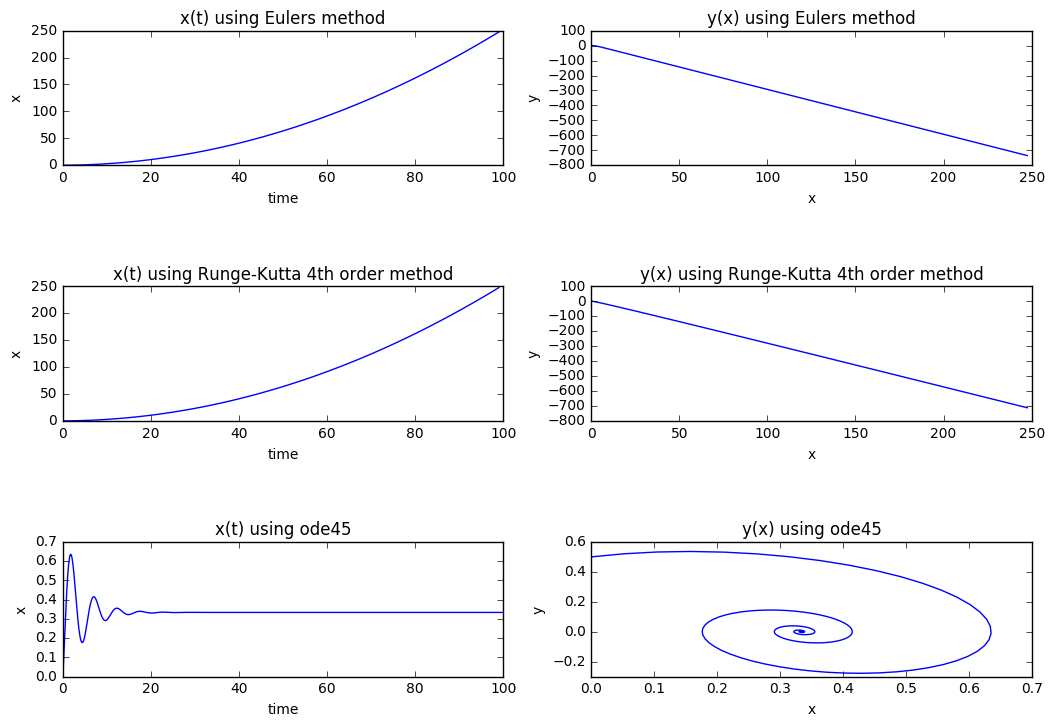

In [49]:
# Numerical integration (Euler, 4order Runge Kutta, ode45)
from __future__ import division

# set parameters
F=1
m=2
g=1
k=3

# step size
h=0.05

# set time index up to 100
t=np.arange(0,100,1)
        
# initialize matrix for x and y variable values
# top row is x values in time
# bottom row is y values in time
xy = np.zeros((2,len(t)),dtype=np.float64)

# set initial conditions for x and y
xy[:,0] = [0, 0]      

# define function for ODE
def F_txy(y,x):
    return (F - k*x - g*y)/m

# loop calculation
for i in xrange(1, len(t)):
    # calculate increment
    dt = i*h
    # calculate next value of x, y
    xy[0,i] = xy[0,i-1] + dt
    xy[1,i] = xy[1,i-1] + dt*F_txy(xy[1,i-1], xy[0,i-1])

# plots
plt.subplot(3, 2, 1)
plt.subplots_adjust(hspace=0.9)

plt.plot(t, xy[0,:])
plt.title('x(t) using Eulers method')
plt.xlabel('time')
plt.ylabel('x')

plt.subplot(3, 2, 2)
plt.plot(xy[0,:], xy[1,:])
plt.title('y(x) using Eulers method')
plt.xlabel('x')
plt.ylabel('y')

## solving ODE using Runge-Kutta 4th order method
# code adapted from MATLABcentral file by original author Ido Schwartz

# step size
h=0.05

# set time index up to 100
t=np.arange(0,100,1)
        
# initialize matrix for x and y variable values
# top row is x values in time
# bottom row is y values in time
xy = np.zeros((2,len(t)),dtype=np.float64)

# set initial conditions for x and y
xy[:,0] = [0, 0]  

# #define function for ODE (function already defined above)             

#loop calculation
for i in xrange(1, len(t)):
    dt = i*h
    # calculate runge kutta increments
    k1 =  F_txy(xy[1,i-1], xy[0,i-1])
    k2 = F_txy(xy[1,i-1]+ 0.5*k1, xy[0,i-1]+dt/2)
    k3 = F_txy(xy[1,i-1]+0.5*k2, xy[0,i-1]+dt/2)
    k4 = F_txy(xy[1,i-1]+k3, xy[0,i-1]+dt)
    # calculate next value of x, y in time
    xy[0,i] = xy[0,i-1] + dt
    xy[1,i] = xy[1,i-1] + (k1+2*(k2+k3)+k4)/6

#plots
plt.subplot(3, 2, 3)
plt.plot(t, xy[0,:])
plt.title('x(t) using Runge-Kutta 4th order method')
plt.xlabel('time')
plt.ylabel('x')

plt.subplot(3, 2, 4)
plt.plot(xy[0,:], xy[1,:])
plt.title('y(x) using Runge-Kutta 4th order method')
plt.xlabel('x')
plt.ylabel('y')

# solving ODE using ode45
from scipy.integrate import odeint

# set time index up to 100
t=np.arange(0,100,0.1)
        
# initialize matrix for x and y variable values
# top row is x values in time
# bottom row is y values in time
xy = np.zeros((2,len(t)),dtype=np.float64)

def f(z,t):
    x, y=z
    return [y, (F - k*x - g*y)/m]  

z0 = [0, F/m]

xy = odeint(f, z0, t)

plt.subplot(3, 2, 5)
plt.plot(t, xy[:,0])
plt.title('x(t) using ode45')
plt.xlabel('time')
plt.ylabel('x')

plt.subplot(3, 2, 6)
plt.plot(xy[:,0], xy[:,1])
plt.title('y(x) using ode45')
plt.xlabel('x')
plt.ylabel('y')

c) Play around with the values of the parameters (use ode45). What qualitatively different types of behavior can you obtain? See Nonlinear Dynamics and Chaos (Strogatz), chapter 5, for a more in-depth discussion of two-dimensional linear systems. 4 pts.

d) Delay differential equations (DDEs), $\dot{x}(t) = f(x) + f(x(t − \tau))$, come up frequently in biological systems, but are significantly more difficult to analyze than standard ODEs.
For a single constant delay, the function call is:
dde23(xdot, tau, x0, [ti tf])
where tau is the delay time, xdot is a function handle for the derivative of x, x0 is the value of x between $-\tau$ and 0, [ti tf] are the first and last time values to consider. 

Note: Unlike ode45, dde23 takes a function handle that has three arguments: xdot = @(t,y,z) some function...;
where z is the value $x(t-\tau)$. 

Use dde23 to numerically integrate the function: $\dot{x} = \alpha.x(t-\tau)$ 
Plot your results for $\tau = 1$ with values $\alpha = -\pi/8,-\pi/2,-3\pi/4,-\pi/4$.

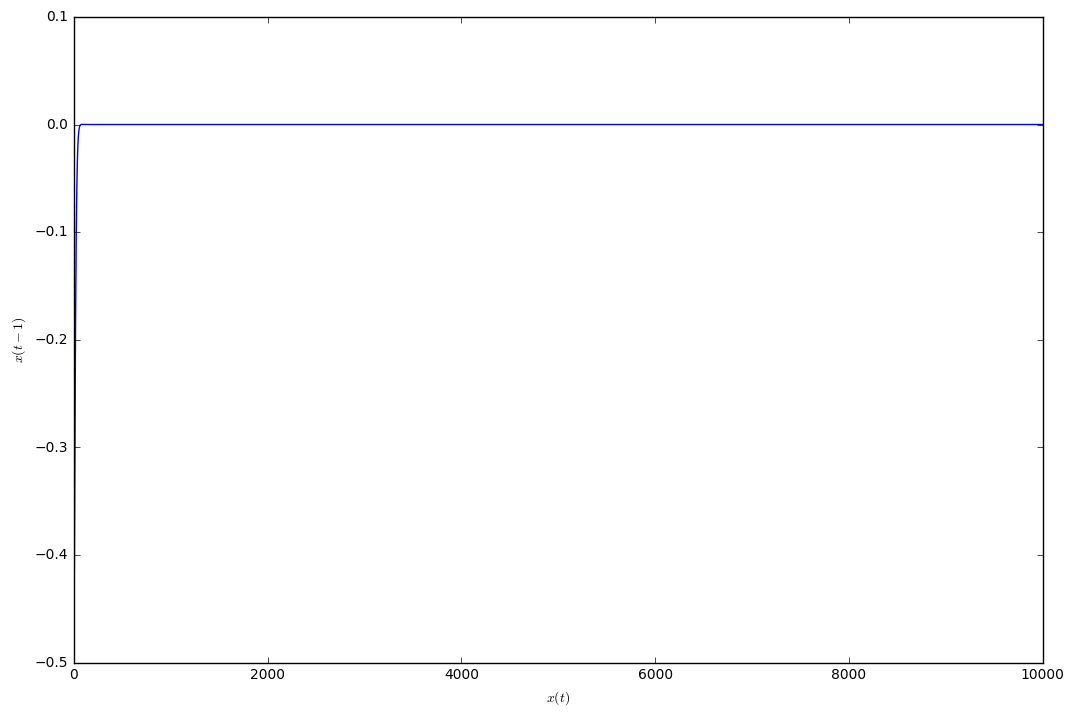

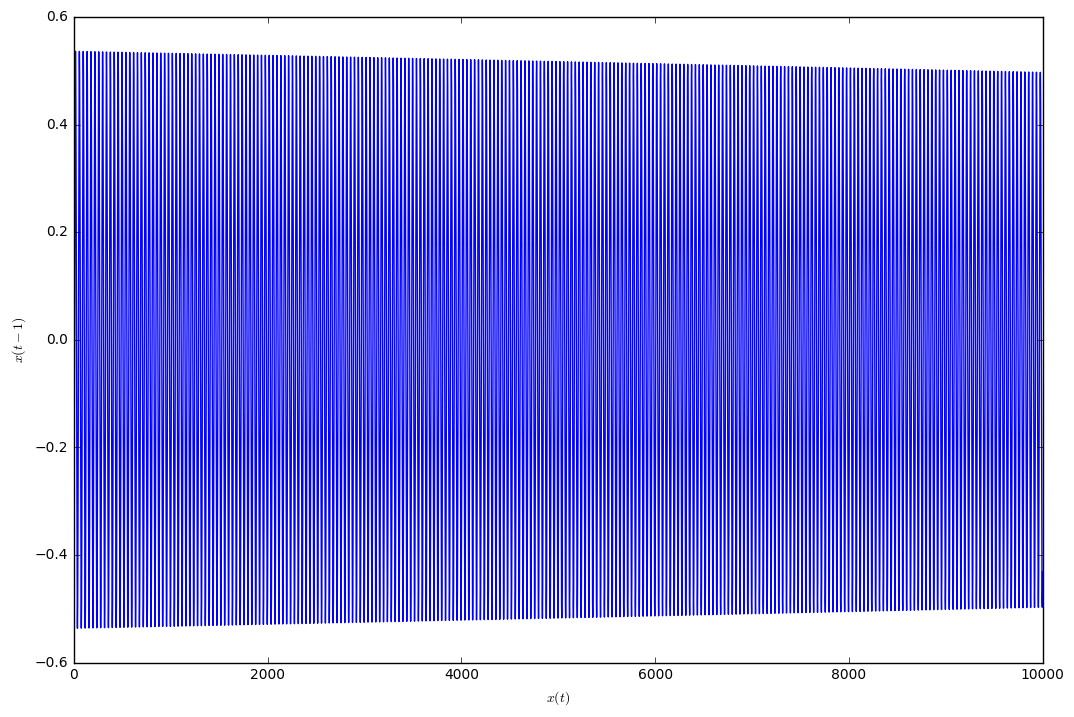

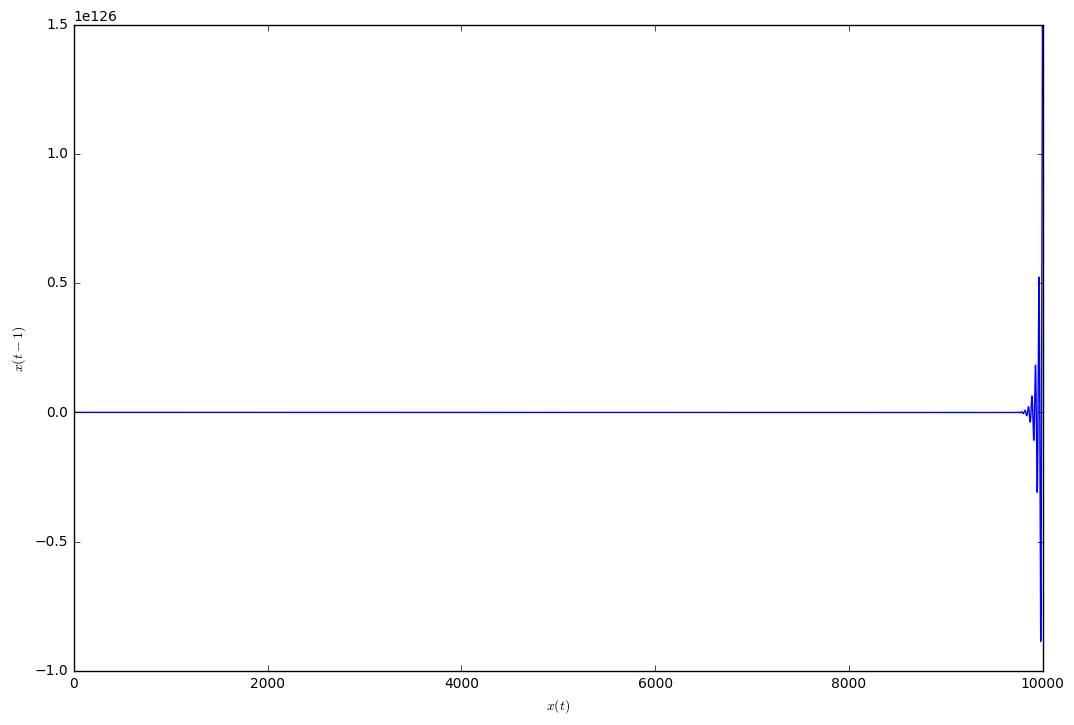

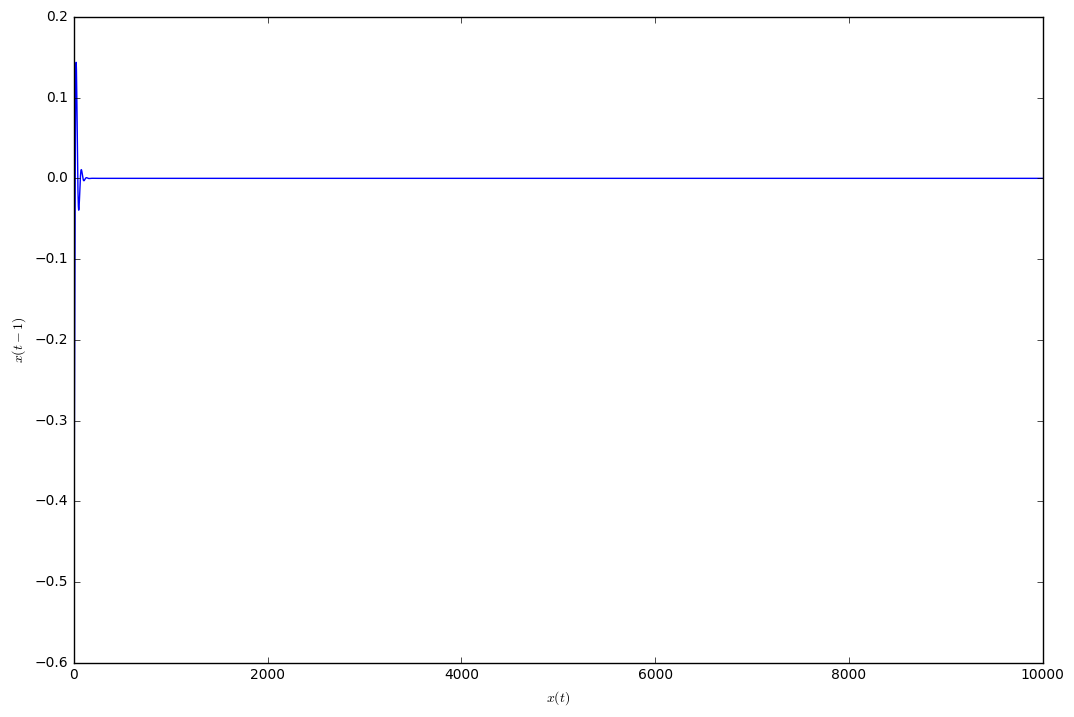

In [14]:
from pydelay import dde23

tau = 1
alphas = [-np.pi/8, -np.pi/2, -3*np.pi/4, -np.pi/4]

# define the equations
eqns = {
    'x' : 'alpha * x(t-tau)'
}

for alpha in alphas:
    params = {
        'tau': tau,
        'alpha'  : alpha
    }

    dde = dde23(eqns=eqns, params=params)

    # solving from t=0 to t=1000 and limit the maximum step size to 1.0
    dde.set_sim_params(tfinal=1000, dtmax=1.0)

    # set value of x0 from {-1, 0} for t between 0 and tau
    histfunc = {
        'x': lambda t: -0.5
    }
    dde.hist_from_funcs(histfunc, 50)

    dde.run()

    # Sample the solution with a stepsize of dt=0.1:
    sol1 = dde.sample(0, 1000, 0.1)
    x1 = sol1['x']

    plt.plot(x1)
    plt.xlabel('$x(t)$')
    plt.ylabel('$x(t - %d)$'%tau)
    plt.show()